## Esercizio 1

Exercise: Create a dataframe of at least 1000 rows about an hypothetical list of employees of your company, extract all employees in the IT department and a Salary greater than 55000.



In [7]:
# Tool preps
import pandas as pd
import numpy as np

In [32]:
# testing Faker to generate random names
from faker import Faker
fake = Faker('it_IT')

for _ in range(10):
  print(fake.name())

Dott. Stefania Travia
Osvaldo Gaggini
Maria Cagnotto-Tropea
Nicola Moneta
Rossana Borrani
Dott. Natalia Sbarbaro
Patrizia Balla-Alonzi
Loredana Bianchi
Benito Angeli
Rosina Ottino


In [37]:
# imposto il seme per riprodurre sempre gli stessi valori
np.random.seed(42)
n = 1000
# Imposto un seed per Faker
fake.seed_instance(42)
#Genero dei nomi
# names = [f"Employee_{i}" for i in range(n)]  # Nomi ipotetici

# Genero i nomi con faker
names = [fake.name() for _ in range(n)]

# Assegno casualmente un dipartimento tra quelli nell'array
departments = np.random.choice(["IT", "HR", "Marketing", "Finance", "Operations"], n) 

#Genero delle età randomiche
ages = np.random.randint(20,60,n)
# Genero delle ral per randomiche tra i valori specificati
ral = np.random.randint(28000, 70000, n)

#  Creo il data frame passando un dizionaro, che avrà il nome colonna delle chiavi, e come valori i singoli elementi di ogni lista
df = pd.DataFrame({
    "Name": names,
    "Age": ages,
    "Department": departments,
    "Salary": ral
})

df.head()

,Name,Age,Department,Salary
0,Camilla Asmundo-Leone,31,Finance,45625
1,Gianfranco Cilea,55,Operations,61893
2,Dott. Tatiana Verdone,23,Marketing,38793
3,Piersanti Balbi,24,Operations,59007
4,Carmelo Galeati,56,Operations,53766


In [38]:
# Creo un nuovo dataframe filtrato per dipartimento e ral
filtered_df=df[(df["Department"] == "IT") & (df["Salary"] > 55000)]

filtered_df

,Name,Age,Department,Salary
24,Romolo Parisi,40,IT,68747
38,Fortunata Visconti,53,IT,56982
55,Galasso Mazzacurati,39,IT,69323
86,Sandro Tedesco,22,IT,64875
87,Diana Bettin,51,IT,59982
...,...,...,...,...
876,Bianca Malaparte,28,IT,68197
896,Severino Tron-Mazzi,40,IT,58519
913,Sophia Taliani,48,IT,55005
937,Ludovico Gramsci,23,IT,65383


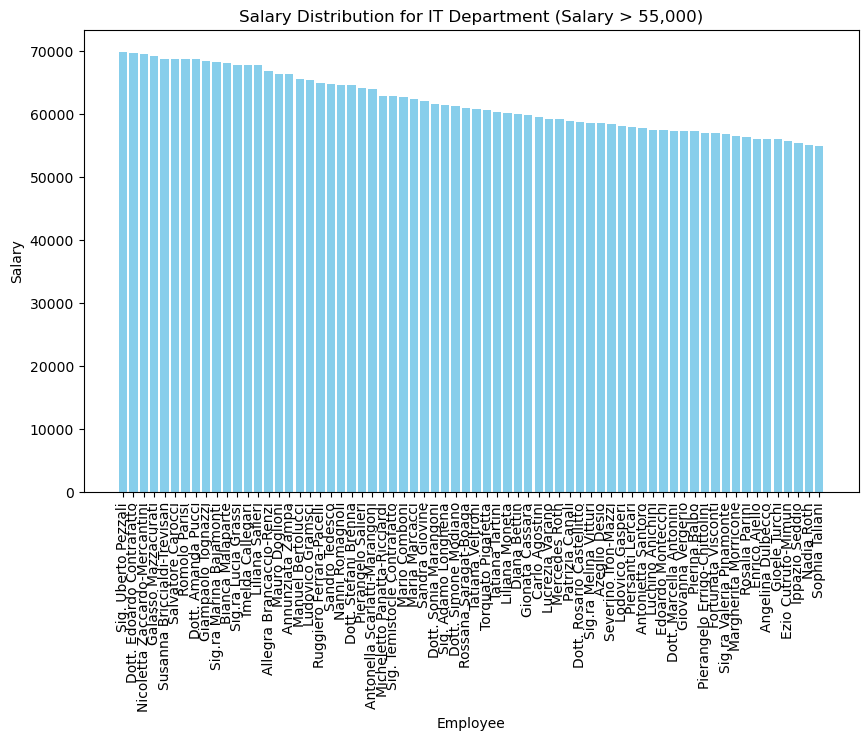

In [39]:
# plot delle ral > 55,000
import matplotlib.pyplot as plt

# sorted dataframe
filtered_df_sorted = filtered_df.sort_values(by="Salary", ascending=False)
# Creiamo un bar plot, usando l'indice come x e il salario come y
plt.figure(figsize=(10,6))
plt.bar(filtered_df_sorted["Name"], filtered_df_sorted["Salary"], color='skyblue')
plt.xlabel('Employee')
plt.ylabel('Salary')
plt.title('Salary Distribution for IT Department (Salary > 55,000)')
plt.xticks(rotation=90)  # Ruota le etichette per evitare sovrapposizioni
plt.show()

## Esercizio 2
Exercise: Create a column to split the data in Low, Medium, High fare prices and calculate the average Age per each section. Fill the Age set to nan and calculate the average age again, how did it change? How can you fill the age so that the average does not change?

In [6]:
# Importo i dati creando un nuovo data frame
df_tit = pd.read_csv("data/titanic.csv")
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Voglio capire da quanto a quanto variano i prezzi dei biglietti, per creare dei bin proporzionati
# non tanto per il loro numero ma per il loro prezzo
print(df_tit["Fare"].min(), df_tit["Fare"].max())
print(df_tit["Fare"].describe())

0.0 512.3292
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [8]:
# Per creare i bin e dividere nelle 3 fasce di prezzo posso usare i 3 quartili
# Creiamo i bin basati sui quartili, e farò in modo che:
# Low va da prezzo minimo a primo quartile
# Medium va da primo quartile al terzo quartile
# High va dal terzo quartile al valore massimo
bins = [df_tit['Fare'].min(), df_tit['Fare'].quantile(0.25), df_tit['Fare'].quantile(0.75), df_tit['Fare'].max()]
labels = ['Low', 'Medium', 'High']

df_tit['Fare_Category'] = pd.cut(df_tit['Fare'], bins=bins, labels=labels, include_lowest=True)

print(df_tit[['Fare', 'Fare_Category']])

print("\nRange di Prezzo per ciascuna categoria:")
for i, label in enumerate(labels):
    start = bins[i]
    end = bins[i+1]
    print(f"{label}: {start:.2f} - {end:.2f}")

        Fare Fare_Category
0     7.2500           Low
1    71.2833          High
2     7.9250        Medium
3    53.1000          High
4     8.0500        Medium
..       ...           ...
886  13.0000        Medium
887  30.0000        Medium
888  23.4500        Medium
889  30.0000        Medium
890   7.7500           Low

[891 rows x 2 columns]

Range di Prezzo per ciascuna categoria:
Low: 0.00 - 7.91
Medium: 7.91 - 31.00
High: 31.00 - 512.33


In [37]:
# Controllo la distribuzione dei bin
print(df_tit["Fare_Category"].value_counts())

Medium    446
Low       223
High      222
Name: Fare_Category, dtype: int64


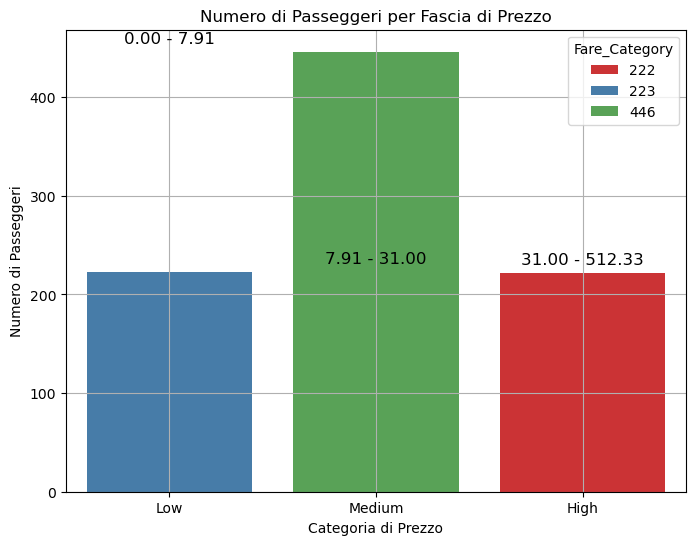

In [9]:
# Lo mostro graficamente
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolare il numero di valori in ciascuna fascia
fare_category_counts = df_tit['Fare_Category'].value_counts()

# Creare un grafico a barre per visualizzare le frequenze per ciascuna fascia di prezzo
plt.figure(figsize=(8, 6))

# Creiamo un grafico a barre
sns.barplot(x=fare_category_counts.index, y=fare_category_counts.values, palette='Set1', hue=fare_category_counts)

# Aggiungi titolo e etichette
plt.title('Numero di Passeggeri per Fascia di Prezzo')
plt.xlabel('Categoria di Prezzo')
plt.ylabel('Numero di Passeggeri')
plt.grid(True)

# Aggiungi le etichette per i range di ciascuna fascia
for i, label in enumerate(fare_category_counts.index):
    start = bins[i]
    end = bins[i + 1]
    plt.text(i, fare_category_counts.values[i] + 5, f'{start:.2f} - {end:.2f}', 
             horizontalalignment='center', verticalalignment='bottom', fontsize=12, color='black')

# Mostriamo il grafico
plt.show()


In [10]:
mean_age_for_fare_cat = df_tit.groupby("Fare_Category")["Age"].mean()
print(mean_age_for_fare_cat)

Fare_Category
Low       28.328671
Medium    29.035146
High      31.999588
Name: Age, dtype: float64


In [11]:
# controllo quanti sono i valori vuoti di AGE
df_tit["Age"].isna().sum()

177

In [12]:
# controllo come varia l'età
df_tit["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## Dataframe riempito con valori numerici randomici con range minAge e MaxAge

In [13]:
# creo un nuovo dataframe che riempie randomicamente l'età, con un range randomico da 0.4 a 80 (min-max)
min_max_age = df_tit["Age"].agg([min,max])
print(min_max_age)

min     0.42
max    80.00
Name: Age, dtype: float64


In [14]:
# prendo i valori assegnandoli alle variabili per usarle nel range
min_age = min_max_age["min"]
max_age = min_max_age["max"]

# definisco una funzione per generare i valori randomici
def random_age(row):
    return np.random.randint(min_age, max_age + 1)
    
# creo una copia del dataframe
df_tit_random_age = df_tit.copy()
# Faccio il fill dei valori vuoti con quelli random
df_tit_random_age["Age"] = df_tit_random_age.apply(lambda row: random_age(row) if pd.isna(row["Age"]) else row["Age"], axis=1)

#vedo se ho riempito tutto
df_tit_random_age["Age"].isna().sum()

0

In [19]:
# Ricalcolo la media per il nuovo data frame
mean_age_for_fare_cat_random = df_tit_random_age.groupby("Fare_Category")["Age"].mean()
print(mean_age_for_fare_cat_random)

Fare_Category
Low       31.484305
Medium    30.940022
High      33.360000
Name: Age, dtype: float64


In [15]:
# Quella iniziale invece era
mean_age_for_fare_cat = df_tit.groupby("Fare_Category")["Age"].mean()
print(mean_age_for_fare_cat)

Fare_Category
Low       28.328671
Medium    29.035146
High      31.999588
Name: Age, dtype: float64


## Data Frame dove metto al posto dei Nan in age, la media di age

In [16]:
# La media è cambiata, quindi posso provare invece di riempire in NaN di age randomicamente, userò il valore medio:
# creo una copia del dataframe
df_tit_fitted_mean_age = df_tit.copy()

# Faccio il fill dei valori vuoti con quelli random
df_tit_fitted_mean_age["Age"] = df_tit_fitted_mean_age["Age"].fillna(df_tit["Age"].mean())

In [17]:
# calcolo le nuove medie per vedere se non cambiano da quelle iniziali
mean_age_for_fare_cat_with_mean = df_tit_fitted_mean_age.groupby("Fare_Category")["Age"].mean()
print(mean_age_for_fare_cat_with_mean)

Fare_Category
Low       28.820311
Medium    29.137868
High      31.709438
Name: Age, dtype: float64


## Confronto i 3 risultati

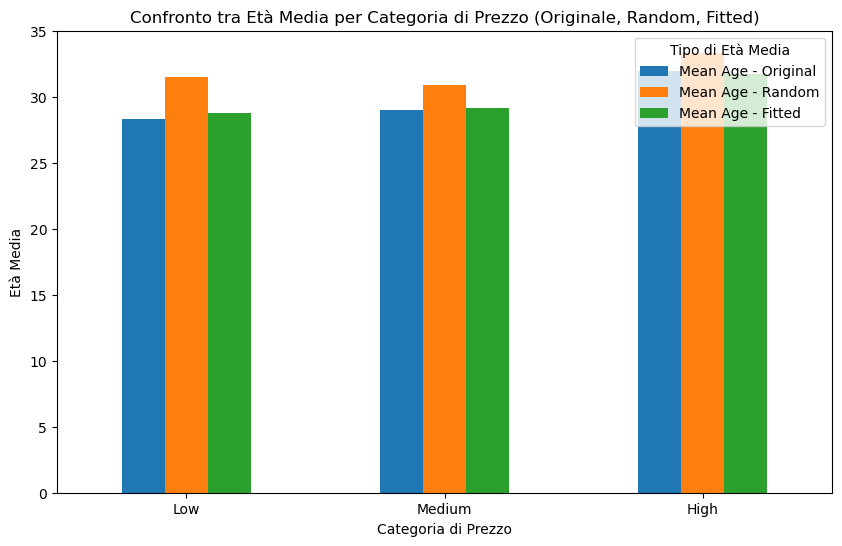

In [20]:
# Creazione di un DataFrame con le età medie per confronto
age_comparison = pd.DataFrame({
    'Category': mean_age_for_fare_cat.index,
    'Mean Age - Original': mean_age_for_fare_cat.values,
    'Mean Age - Random': mean_age_for_fare_cat_random.values,
    'Mean Age - Fitted': mean_age_for_fare_cat_with_mean.values
})

# Plot del confronto tra età media per categoria
age_comparison.set_index('Category').plot(kind='bar', figsize=(10, 6))
plt.title('Confronto tra Età Media per Categoria di Prezzo (Originale, Random, Fitted)')
plt.ylabel('Età Media')
plt.xlabel('Categoria di Prezzo')
plt.xticks(rotation=0)
plt.legend(title="Tipo di Età Media")
plt.show()


<Figure size 1200x800 with 0 Axes>

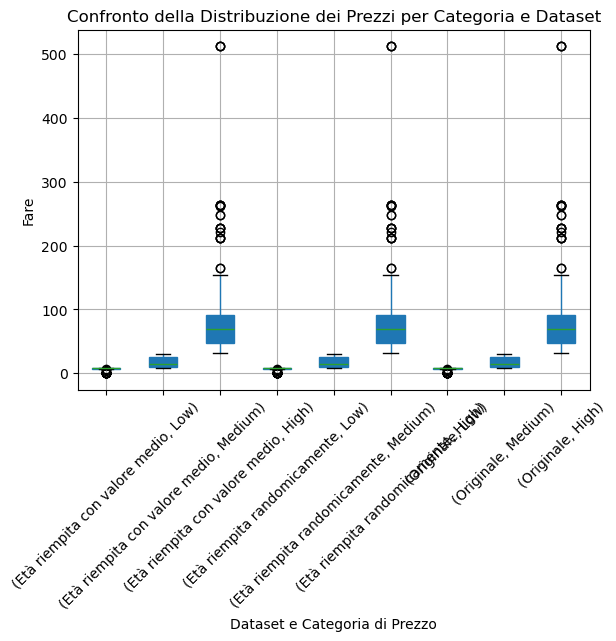

In [22]:
# Provo a vedere cosa accade con i plot box per bin
# Categorizza 'Fare' in ciascun dataset
def categorize_fare(df):
    bins = [df['Fare'].min(), df['Fare'].quantile(0.25), df['Fare'].quantile(0.75), df['Fare'].max()]
    labels = ['Low', 'Medium', 'High']
    df['Fare_Category'] = pd.cut(df['Fare'], bins=bins, labels=labels, include_lowest=True)
    return df

# Applica la categorizzazione a ciascun dataset
df1 = categorize_fare(df_tit)
df2 = categorize_fare(df_tit_random_age)
df3 = categorize_fare(df_tit_fitted_mean_age)

# Aggiungi una colonna che identifichi il dataset di provenienza
df1['Dataset'] = 'Originale'
df2['Dataset'] = 'Età riempita randomicamente'
df3['Dataset'] = 'Età riempita con valore medio'

# Combina i tre dataset in un unico DataFrame
combined_df = pd.concat([df1[['Fare', 'Fare_Category', 'Dataset']], 
                         df2[['Fare', 'Fare_Category', 'Dataset']], 
                         df3[['Fare', 'Fare_Category', 'Dataset']]])

# Creiamo il box plot affiancato
plt.figure(figsize=(12, 8))
combined_df.boxplot(column='Fare', by=['Dataset', 'Fare_Category'], patch_artist=True)

# Aggiungiamo il titolo e le etichette
plt.title('Confronto della Distribuzione dei Prezzi per Categoria e Dataset')
plt.suptitle('')  # Rimuove il titolo automatico che pandas aggiunge
plt.xlabel('Dataset e Categoria di Prezzo')
plt.ylabel('Fare')

# Mostra il grafico
plt.xticks(rotation=45)
plt.show()

## Box Plot
Credo di non capirli. Faccio un focus.

Un box plot (o diagramma a scatola) è uno strumento grafico che permette di visualizzare la distribuzione di un insieme di dati. Ecco come funziona in modo semplice:

La scatola (box): rappresenta l'intervallo interquartile, cioè la parte centrale dei dati, che va dal primo quartile (Q1) al terzo quartile (Q3). Questa scatola contiene il 50% dei dati.

La linea dentro la scatola: è la mediana, che divide i dati in due metà uguali.

Le linee (o baffi): partono dalla scatola e indicano il range dei dati, escludendo i valori anomali (outlier). I baffi si estendono fino al valore massimo e minimo che non siano considerati outlier.

Gli outlier: sono i valori che si trovano al di fuori dei baffi e vengono rappresentati come dei punti separati.

In sintesi, il box plot ti mostra:

Dove si concentra la maggior parte dei dati (mediana e intervallo interquartile).
La variabilità dei dati (baffi e scatola).
Eventuali valori estremi o anomali (outlier).
È uno strumento utile per capire rapidamente la distribuzione e la presenza di dati anomali!

<img src="image/box-plot.png">

<Figure size 1200x800 with 0 Axes>

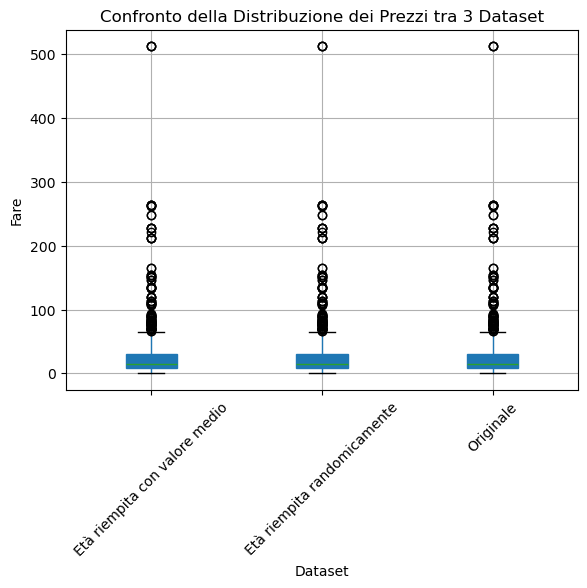

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che df1, df2 e df3 siano i tuoi dataset originali
# Aggiungi una colonna per identificare il dataset
df1['Dataset'] = 'Originale'
df2['Dataset'] = 'Età riempita randomicamente'
df3['Dataset'] = 'Età riempita con valore medio'

# Combina i tre dataset in un unico DataFrame
combined_df = pd.concat([df1[['Fare', 'Dataset']], 
                         df2[['Fare', 'Dataset']], 
                         df3[['Fare', 'Dataset']]])

# Creiamo il box plot affiancato per 'Fare' nei 3 dataset
plt.figure(figsize=(12, 8))
combined_df.boxplot(column='Fare', by='Dataset', patch_artist=True)

# Aggiungiamo il titolo e le etichette
plt.title('Confronto della Distribuzione dei Prezzi tra 3 Dataset')
plt.suptitle('')  # Rimuove il titolo automatico che pandas aggiunge
plt.xlabel('Dataset')
plt.ylabel('Fare')

plt.xticks(rotation=45)
# Mostra il grafico
plt.show()


##  Chiedo a GPT perchè ho tutti questi valori sopra il valore massimo
Se hai tanti punti sopra il valore massimo (cioè, fuori dai baffi superiori nel box plot), questo potrebbe indicare outlier estremi, cioè valori che sono molto più alti rispetto al resto dei dati. In generale, un box plot definisce il valore massimo come il punto più lontano dentro i baffi superiori, e qualsiasi dato che si trovi oltre questo limite viene considerato un outlier.

Ecco alcune possibili spiegazioni per molti punti sopra il valore massimo:

Distribuzione asimmetrica: Potrebbe esserci una lunga coda a destra della distribuzione, il che significa che la maggior parte dei dati è concentrata nella parte inferiore, ma ci sono alcuni valori molto alti che si distaccano.

Variabilità naturale o eccezionale: In alcuni casi, potrebbero esserci eventi o fattori che generano valori estremamente alti, ma che sono ancora validi e parte del dataset. Ad esempio, se stai misurando i redditi di una popolazione, un paio di super-ricchi potrebbero far alzare molto il valore massimo.

Errori nei dati: Se i punti sopra il valore massimo sono inaspettati e non hanno una spiegazione razionale, potrebbero essere errori nei dati (come misurazioni sbagliate o dati inseriti erroneamente).

Quando vedi tanti outlier sopra il valore massimo, potrebbe essere utile investigare ulteriormente per capire la causa. Potresti anche decidere di rimuoverli o trattarli in modo speciale, a seconda del contesto del tuo lavoro.

Nel caso dei prezzi dei biglietti del Titanic, ci sono sicuramente outliers per diversi motivi. Ecco alcune considerazioni:

Differenza tra classi: Il Titanic aveva tre classi di cabine (prima, seconda e terza), e i biglietti per la prima classe erano molto più costosi rispetto a quelli per la terza classe. Il prezzo dei biglietti della prima classe potrebbe essere molto alto, e ci potrebbero essere alcuni outliers nei dati se ci sono biglietti venduti a prezzi eccezionali per la classe più alta (come per una suite di lusso).

Diversità dei passeggeri: Ci potrebbero essere anche passeggeri con status elevato, come vip, celebrità o ricchi che hanno pagato prezzi esorbitanti per biglietti di prima classe. Alcuni di questi prezzi potrebbero essere nettamente più alti rispetto alla maggior parte dei passeggeri.

Eventi rari o situazioni speciali: Alcuni passeggeri, per esempio, potrebbero aver pagato per cabine private o altre sistemazioni speciali che non erano rappresentative del prezzo medio.

Se stai analizzando i prezzi dei biglietti, probabilmente troverai molte variazioni estreme (outliers), specialmente nei prezzi delle prime classi. Se ti interessa un'analisi più precisa, potresti considerare di separare i dati per classe (prima, seconda e terza) e analizzare ogni gruppo separatamente. In questo modo, i prezzi fuori scala nella prima classe non distorceranno l'analisi degli altri gruppi.